# Breast Cancer Classification
## Feature Creation
According to the American Cancer Society (ACS), breast cancer is the most common cancer in American women, except for skin cancers.  Today, a woman’s chance of getting breast cancer is 1 in 8 chance. The chance that a woman will die from breast cancer is about 2.6%, or a 1 in 38 chance. Breast cancer still causes about 685.000 deaths annually in the world. Breast cancer research opens the door to finding better ways to prevent, detect, and treat breast cancer.<br>
Early detection, often through screening (mammogram, breast ultrasound, MRI), can catch the disease when it is most treatable.  Its detection ability depends on tumor size and breast tissue density. 

The goal is to classify tumors as malignant (cancerous) or benign (non cancerous).

Breast Cancer Wisconsin (Diagnostic) Dataset is taken from https://www.kaggle.com/yasserh/breast-cancer-dataset. The dataset contains a description and size of specific cells in the breast with diagnosis.

Feature creation includes feature engineering (splitting or combining features, creating new features, normalization/standardization, etc.) and feature selection (removing redundant or irrelevant features, reduce dimensionality). Feature creation significantly affects  model train process because the dataset becomes optimal. We can reduce training time and computation cost, use less memory, avoid overfitting. Also correct features help to interpret model results easily.


#### Required steps
- breast-cancer.csv should be downloaded from https://www.kaggle.com/yasserh/breast-cancer-dataset
- use Python 3.7
- virtual environment contains:
    - pandas==1.0.5
    - numpy==1.19.2
    - matplotlib==3.2.2
    - seaborn==0.10.8
    - imbalanced-learn==0.7.0
    - sklearn==0.23.2
    - tensorflow==2.4.4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install imbalanced-learn==0.7.0



/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 167 kB 26.7 MB/s eta 0:00:01


In [4]:
source_df = pd.read_csv('breast-cancer.csv')  # for local notebook

In [11]:
# shapre of source file
print('Shape:',source_df.shape)
print('Columns:', source_df.columns)

Shape: (569, 32)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## Features
What we did duting CLaening Data Phase:
- Data types of columns matching their content. All columns have float dat type and the datatype relate to the columns meaning (radius_mean, texture_mean, etc.)
- All values are non-null in the source file so we did not handle missing values
- The source file does not have duplicates
- Column 'id' will not be used as a feature because meaningless for our study
- The value distribution of each feature make sense but we discovered some outliers which were updated using Inter Quantile Range technique

In [12]:
# check datatypes of columns and nan values
source_df.isnull().values.any()

False

In [13]:
#check duplicates
source_df.duplicated().sum()

0

In [14]:
#drop id column
source_df. drop(['id'], axis=1, inplace=True)
source_df.shape

(569, 31)

update outliers

In [15]:
features = source_df.columns[1:]
len(features)

30

In [16]:
def replace_outliers(col):
#     #the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
#     percentile_10=col.quantile(0.1)
#     percentile_90=col.quantile(0.9)
#     print(percentile_10, percentile_90)
    
#     col = np.where(col < percentile_10, percentile_10, col)
#     col = np.where(col > percentile_90, percentile_90, col)
    percentile_25=col.quantile(0.25)
    percentile_75=col.quantile(0.75)

    IQR = percentile_75-percentile_25
    upper_limit=percentile_75+1.5*IQR
    lower_limit=percentile_25-1.5*IQR
    print(upper_limit, lower_limit)
    col = np.where(col < lower_limit, lower_limit, col)
    col = np.where(col > upper_limit, upper_limit, col)

    return col

21.9 5.579999999999999
*** radius_mean ***
count    569.000000
mean      14.062916
std        3.340025
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       21.900000
Name: radius_mean, dtype: float64


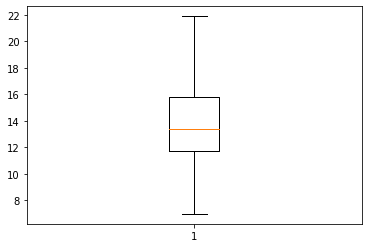

30.244999999999997 7.725000000000003
*** texture_mean ***
count    569.000000
mean      19.254736
std        4.187510
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       30.245000
Name: texture_mean, dtype: float64


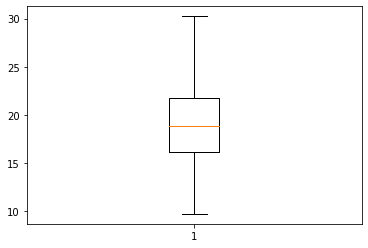

147.49499999999998 31.775000000000013
*** perimeter_mean ***
count    569.000000
mean      91.543787
std       23.047218
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      147.495000
Name: perimeter_mean, dtype: float64


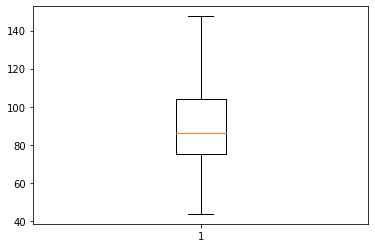

1326.3000000000002 -123.30000000000001
*** area_mean ***
count     569.000000
mean      639.765202
std       305.343508
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      1326.300000
Name: area_mean, dtype: float64


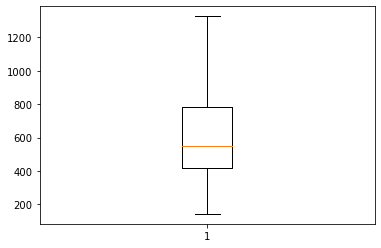

0.133695 0.057975
*** smoothness_mean ***
count    569.000000
mean       0.096266
std        0.013685
min        0.057975
25%        0.086370
50%        0.095870
75%        0.105300
max        0.133695
Name: smoothness_mean, dtype: float64


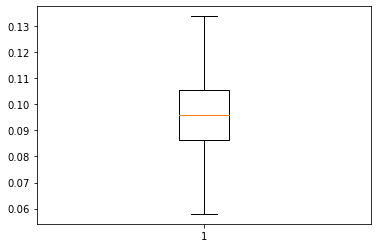

0.22861999999999996 -0.03329999999999997
*** compactness_mean ***
count    569.000000
mean       0.103222
std        0.049386
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.228620
Name: compactness_mean, dtype: float64


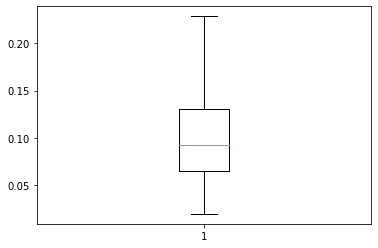

0.28241000000000005 -0.12215000000000001
*** concavity_mean ***
count    569.000000
mean       0.086937
std        0.073900
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.282410
Name: concavity_mean, dtype: float64


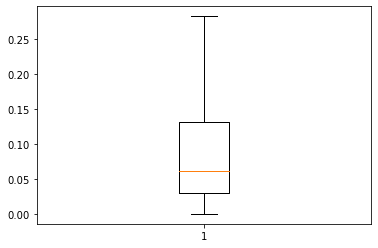

0.15453500000000003 -0.06022500000000003
*** concave points_mean ***
count    569.000000
mean       0.048552
std        0.037633
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.154535
Name: concave points_mean, dtype: float64


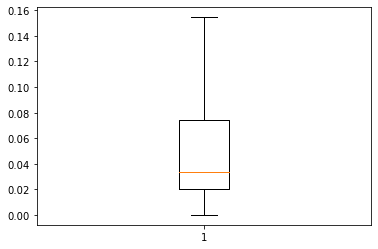

0.24640000000000006 0.11119999999999995
*** symmetry_mean ***
count    569.000000
mean       0.180734
std        0.026067
min        0.111200
25%        0.161900
50%        0.179200
75%        0.195700
max        0.246400
Name: symmetry_mean, dtype: float64


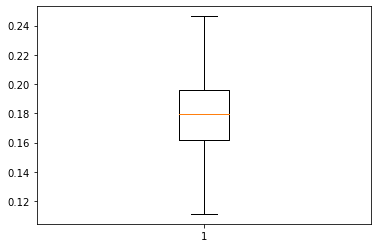

0.07874999999999999 0.045070000000000006
*** fractal_dimension_mean ***
count    569.000000
mean       0.062604
std        0.006418
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.078750
Name: fractal_dimension_mean, dtype: float64


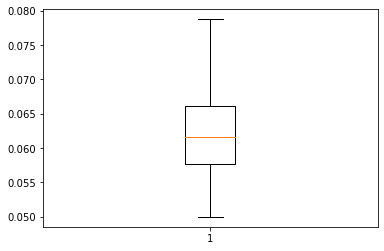

0.84865 -0.13735000000000003
*** radius_se ***
count    569.000000
mean       0.384698
std        0.203612
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        0.848650
Name: radius_se, dtype: float64


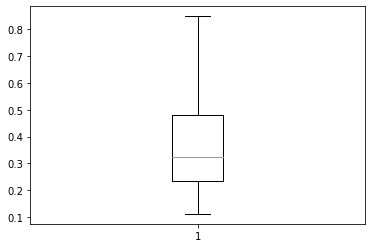

2.43415 -0.12625000000000008
*** texture_se ***
count    569.000000
mean       1.198057
std        0.485500
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        2.434150
Name: texture_se, dtype: float64


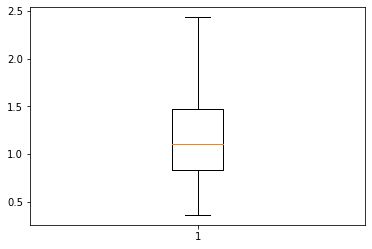

5.983499999999999 -1.0205000000000002
*** perimeter_se ***
count    569.000000
mean       2.699075
std        1.402982
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max        5.983500
Name: perimeter_se, dtype: float64


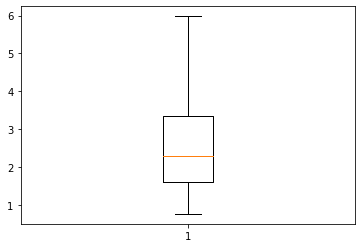

86.19999999999999 -23.15999999999999
*** area_se ***
count    569.000000
mean      34.959487
std       24.294515
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max       86.200000
Name: area_se, dtype: float64


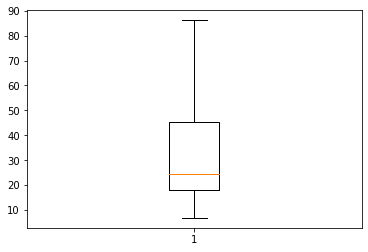

0.012611499999999998 0.0007035000000000019
*** smoothness_se ***
count    569.000000
mean       0.006876
std        0.002410
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.012611
Name: smoothness_se, dtype: float64


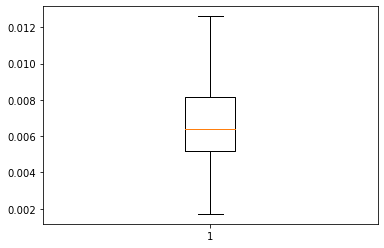

0.061505 -0.015974999999999996
*** compactness_se ***
count    569.000000
mean       0.024561
std        0.014947
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.061505
Name: compactness_se, dtype: float64


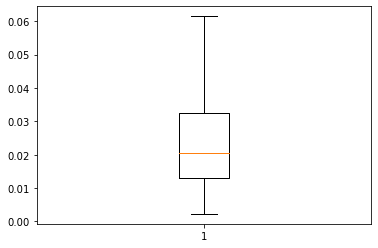

0.08249 -0.025349999999999998
*** concavity_se ***
count    569.000000
mean       0.030038
std        0.020577
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.082490
Name: concavity_se, dtype: float64


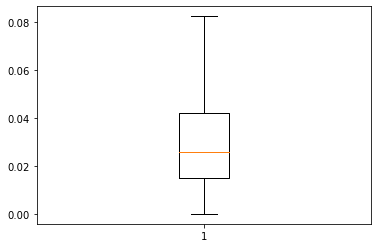

0.025318 -0.0029699999999999996
*** concave points_se ***
count    569.000000
mean       0.011601
std        0.005486
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.025318
Name: concave points_se, dtype: float64


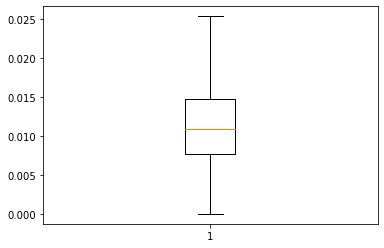

0.035960000000000006 0.0026799999999999984
*** symmetry_se ***
count    569.000000
mean       0.020047
std        0.006572
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.035960
Name: symmetry_se, dtype: float64


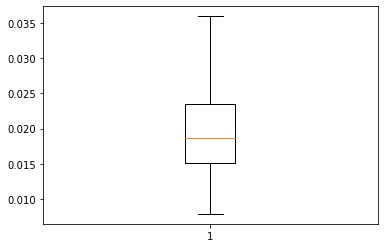

0.008022999999999999 -0.0012169999999999993
*** fractal_dimension_se ***
count    569.000000
mean       0.003591
std        0.001780
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.008023
Name: fractal_dimension_se, dtype: float64


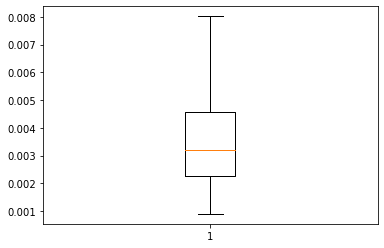

27.459999999999997 4.340000000000002
*** radius_worst ***
count    569.000000
mean      16.183882
std        4.587249
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       27.460000
Name: radius_worst, dtype: float64


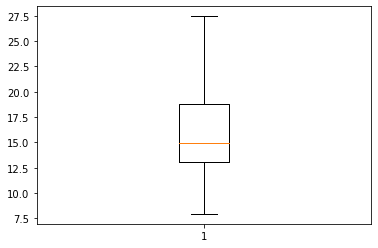

42.68 8.119999999999997
*** texture_worst ***
count    569.000000
mean      25.648453
std        6.054406
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       42.680000
Name: texture_worst, dtype: float64


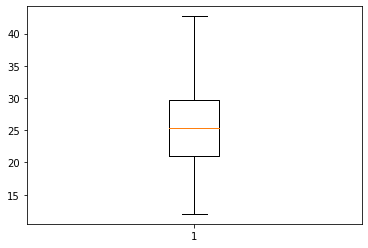

187.335 22.17499999999999
*** perimeter_worst ***
count    569.000000
mean     106.705369
std       31.957777
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      187.335000
Name: perimeter_worst, dtype: float64


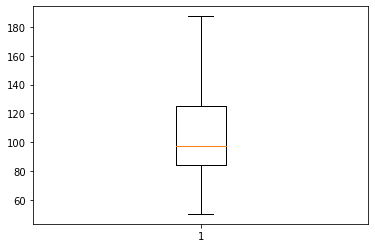

1937.0500000000002 -337.7500000000001
*** area_worst ***
count     569.000000
mean      849.907821
std       475.645240
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      1937.050000
Name: area_worst, dtype: float64


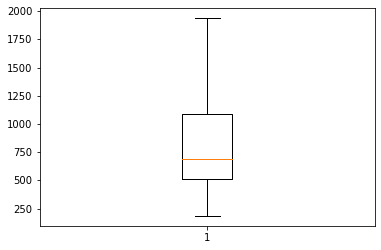

0.1901 0.07250000000000001
*** smoothness_worst ***
count    569.000000
mean       0.132209
std        0.022320
min        0.072500
25%        0.116600
50%        0.131300
75%        0.146000
max        0.190100
Name: smoothness_worst, dtype: float64


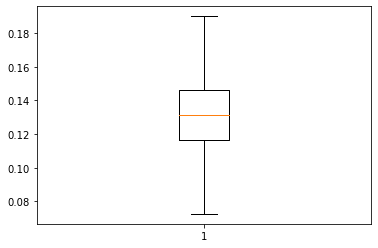

0.6269500000000001 -0.14065000000000005
*** compactness_worst ***
count    569.000000
mean       0.249883
std        0.142851
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        0.626950
Name: compactness_worst, dtype: float64


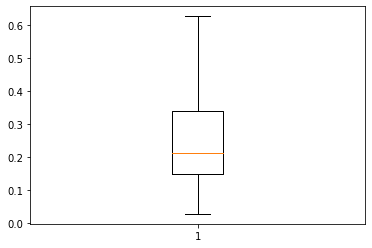

0.7855000000000001 -0.2881000000000001
*** concavity_worst ***
count    569.000000
mean       0.268754
std        0.197461
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        0.785500
Name: concavity_worst, dtype: float64


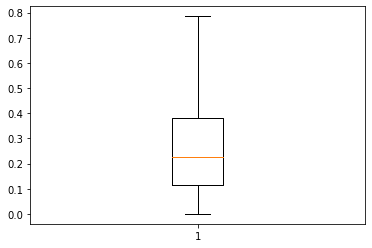

0.30610499999999996 -0.07977499999999997
*** concave points_worst ***
count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64


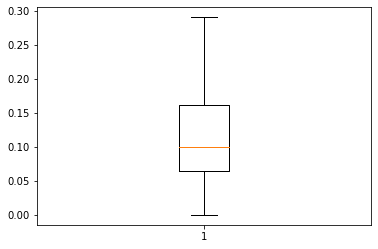

0.41915 0.14915
*** symmetry_worst ***
count    569.000000
mean       0.287616
std        0.053868
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.419150
Name: symmetry_worst, dtype: float64


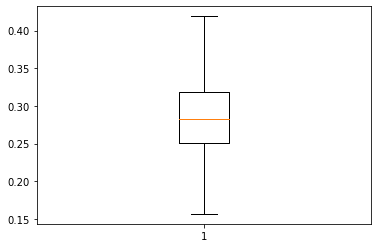

0.12301 0.04053
*** fractal_dimension_worst ***
count    569.000000
mean       0.083342
std        0.015993
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.123010
Name: fractal_dimension_worst, dtype: float64


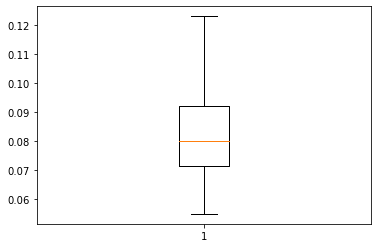

In [17]:
for feature in features:
    source_df[feature] = replace_outliers(source_df[feature])
    print('*** {0} ***'.format(feature))
    print(source_df[feature].describe())
    plt.boxplot(source_df[feature])
    plt.show()

### Remove highly correlated features

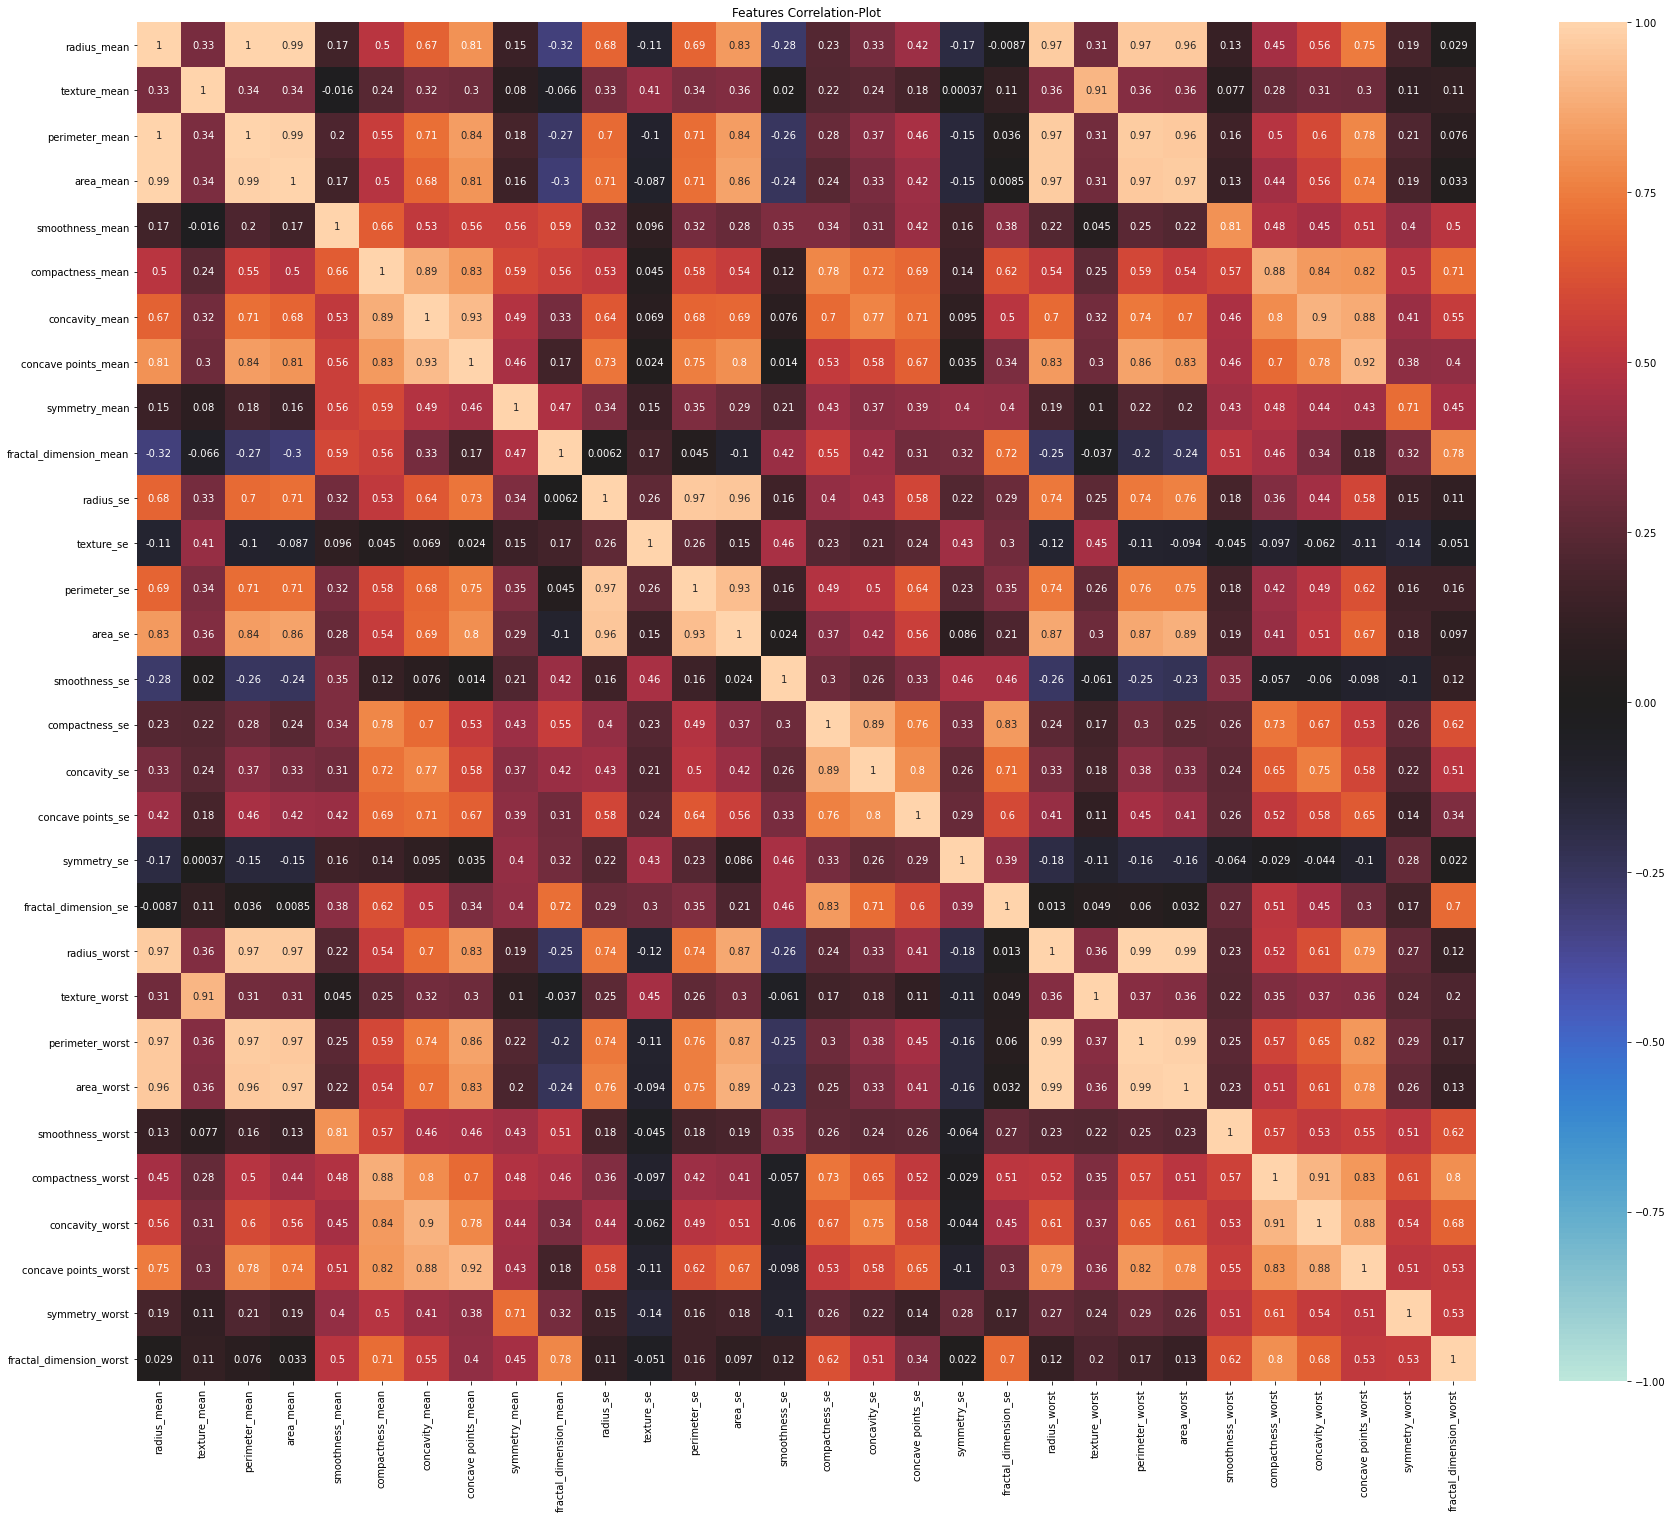

In [18]:
plt.figure(figsize=[30,25])
plt.title('Features Correlation-Plot')
sns.heatmap(source_df[features].corr(), vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [19]:
#Creating the Correlation matrix and Selecting the Upper trigular matrix
cor_matrix = source_df[features].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [20]:
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.33276,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,0.319056,...,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,NaN,NaN,0.339588,0.341552,0.015997,0.241666,0.318654,0.301509,0.079586,0.065946,...,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,NaN,NaN,NaN,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,0.266586,...,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,NaN,NaN,NaN,NaN,0.167400,0.498665,0.680126,0.814133,0.155152,0.303524,...,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.661938,0.526544,0.560961,0.557597,0.586706,...,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.889882,0.832541,0.588842,0.557003,...,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928382,0.489029,0.325513,...,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460386,0.170028,...,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471760,...,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.252727,0.037384,0.202961,0.235192,0.505984,0.456164,0.335359,0.178397,0.323400,0.776915


In [21]:
#Dropping the column with high correlation
to_drop = [feature for feature in features if any(upper_tri[feature] > 0.95)]
to_drop


['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [22]:
source_df.drop(to_drop, axis=1, inplace = True)

In [23]:
final_features = source_df.columns[1:]
len(final_features)

23

### Normalize features using Min-Max Scaling
It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.<br>
<font color="red">For current moment we will normalize whole dataset</font>

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(source_df[final_features])
scaled_features = scaler.transform(source_df[final_features])



In [25]:
source_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,...,0.01587,0.03003,0.006193,17.33,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,M,20.57,17.77,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,M,19.69,21.25,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,M,11.42,20.38,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,...,0.01867,0.03596,0.008023,26.50,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,M,20.29,14.34,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,0.84865,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,M,20.13,28.25,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,0.76550,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,M,16.60,28.08,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,0.45640,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,M,20.60,29.33,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,0.72600,...,0.01664,0.02324,0.006185,39.42,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [27]:
scaled_features

array([[0.73791809, 0.03262722, 0.79800581, ..., 0.91202749, 1.        ,
        0.93953215],
       [0.91085193, 0.39250061, 0.35347332, ..., 0.63917526, 0.45117076,
        0.49992644],
       [0.85186675, 0.56196737, 0.68178817, ..., 0.83505155, 0.77974491,
        0.47874062],
       ...,
       [0.64474831, 0.89457025, 0.35096408, ..., 0.48728522, 0.24861984,
        0.34073856],
       [0.91286279, 0.95544193, 0.79008188, ..., 0.91065292, 0.96021321,
        1.        ],
       [0.0522153 , 0.72218164, 0.        , ..., 0.        , 0.49723967,
        0.22583493]])

## Target
The dataset is a little disbalansed. <br>
Benign - 63%
Maligant - 37%


In [28]:
source_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [29]:
source_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [30]:
target = source_df['diagnosis'].map({'M': 1, 'B':0})

In [31]:
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Create balanced dataset
For current moment we create balanced dataset basedon whole dataset for practice. <br>
Balanced dataset is created based on SMOTE algorithm. <br>
####  SMOTE (Synthetic Minority Oversampling Technique) – Oversampling
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.<br>
It aims to balance class distribution by randomly increasing minority class examples by replicating them.<br>
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.<br>


Step 1: Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.<br>
Step 2: The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .<br>
Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:<br>
$x' = x + rand(0, 1) * \mid x - x_k \mid$ <br>
in which rand(0, 1) represents the random number between 0 and 1.<br>

<font color="red">When we will split our dataset to train/test we will create balanced dataset only for train set to avoid overfitting.</font>

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(scaled_features, target)

print('Before OverSampling, the shape of train_X: {}'.format(scaled_features.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(target.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(target == 0)))
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, the shape of train_X: (569, 23)
Before OverSampling, the shape of train_y: (569,) 

Before OverSampling, counts of label '1': 212
Before OverSampling, counts of label '0': 357
After OverSampling, the shape of train_X: (714, 23)
After OverSampling, the shape of train_y: (714,) 

After OverSampling, counts of label '1': 357
After OverSampling, counts of label '0': 357


## Conclusion
- Normalized features using Min-Max Scaling (when we will split our dataset to train/test we will fit scaller based on only train set)
- Removed 7 highly correlated features (>0.95)
- Applied binary encoding to target
- Create balanced dataset to compare model results for unbalanced and balanced dataset (when we will split our dataset to train/test we will create balanced dataset only for train set to avoid overfitting)

